<h1 align="center">NLP Assignment 1</h1>

## Group ID:    152

<b>Group Member:</b><br>
Ashutosh Kumar (<2020fc04341@wilp.bits-pilani.ac.in>)\
Ashwini B R    (<2020fc04180@wilp.bits-pilani.ac.in>)\
Rahul Paul     (<2020fc04350@wilp.bits-pilani.ac.in>)

## Problem Statement

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according to being ham (legitimate) or spam.

 

Link to the Dataset: https://www.kaggle.com/uciml/sms-spam-collection-dataset/download (Links to an external site.)

 

Things to be  done:

a)[Download the file and set it as a Dataframe.](#1)

b)[Remove punctuations, special characters and stopwords from the text in ‘sms’ column. Convert the text to lower case.](#2)

c)[Create two objects X and y. create a CountVectorizer object and split the data into training and testing sets. Train a MultinomialNB model and Display the confusion Matrix](#3)

d)[Display the POS tagging on the first 4 rows of ‘sms’.](#4)

e)[Build and display a dependency parser tree for the sentence :
“the series opened 17 years later, as Viserys Targaryen tried to win an eastern tribal army to his side, so he could retake the Iron Throne”](#5)

In [50]:
##Required Libraries

import numpy as np
import pandas as pd
import re
import os
import pickle
import string
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# NLP 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

# ML
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import spacy
from spacy import displacy

## a) Download the file and set it as a Dataframe. <a id=1></a>

#### Download the dataset:
DATASET Source: https://www.kaggle.com/uciml/sms-spam-collection-dataset/download

In [51]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [53]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (5572, 5)


In [54]:
df.drop(df.columns[[2,3,4]], axis = 1, inplace = True)
df.columns = ['Target','SMS']
df.head()

,Target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


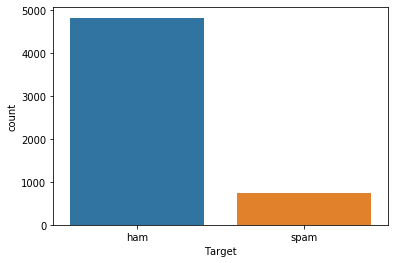

In [55]:
sns.countplot(x ='Target', data = df)
 
# Show the plot
plt.show()

## b) Remove punctuations, special characters and stopwords from the text in ‘sms’ column. Convert the text to lower case. <a id=2></a>

In [56]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove Punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A) #remove special character
    text = str(text).lower() #Convert to lower case
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)  
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords
def remove_stopwords(text): #remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

#### Remove Punctuations, special characters and conversion of text to lower case

In [57]:
df['SMS'] = df['SMS'].apply(clean_text)
df.head()

,Target,SMS
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


#### Removal of Stopwords

In [58]:
df['SMS'] = df['SMS'].apply(remove_stopwords)
df.head()

,Target,SMS
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts st...
3,ham,dun say early hor already say
4,ham,nah dont think goes usf lives around though


## c) Create two objects X and y. create a CountVectorizer object and split the data into training and testing sets. Train a MultinomialNB model and Display the confusion Matrix. <a id=3></a> 

In [59]:
X = df.SMS
y = df.Target
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [61]:
# instantiate the vectorizer (with the default parameters)
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [62]:
# transform training data into a 'document-term matrix'
X_train_dtm = vect.transform(X_train)
X_train_dtm

<4179x7177 sparse matrix of type '<class 'numpy.int64'>'
	with 33817 stored elements in Compressed Sparse Row format>

In [63]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [64]:
# examine the document-term matrix
X_train_dtm

<4179x7177 sparse matrix of type '<class 'numpy.int64'>'
	with 33817 stored elements in Compressed Sparse Row format>

In [65]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7177 sparse matrix of type '<class 'numpy.int64'>'
	with 9783 stored elements in Compressed Sparse Row format>

In [66]:
# import and instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [67]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 12 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [68]:
# make class predictions for X_test_dtm
y_pred_test = nb.predict(X_test_dtm)
# make class predictions for X_train_dtm
y_pred_train = nb.predict(X_train_dtm)

In [69]:
def cfmat(name, y_train, y_pred_train, y_test, y_pred_test):
    
    print("\n-----------------------------{}-----------------------------\n".format(name))
    
    cm_train = confusion_matrix(y_train, y_pred_train)
    s1 = round((cm_train[0,0]/(cm_train[0,0] + cm_train[0,1])),4)
    print('\n','\033[1m' + 'Classification Report for Train Data' + '\033[0m')
    print(classification_report(y_train, y_pred_train)) 
    print("---------------------------------------------------------------------------")
    print("Specificity on Train Data: ", s1)
    print("Accuracy on Train Data: ", round(accuracy_score(y_train, y_pred_train),4))
    print("F1 Score on Train Data: ", round(f1_score(y_train, y_pred_train,pos_label="spam"),4))    
    print("***************************************************************************")
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    s2 = round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4)
    print('\n','\033[1m' + 'Classification Report for Test Data' + '\033[0m')
    print(classification_report(y_test, y_pred_test))   
    print("---------------------------------------------------------------------------")
    print("Specificity on Test Data: ", s2)
    print("Accuracy on Test Data: ", round(accuracy_score(y_test, y_pred_test), 4))
    print("F1 Score Test Data: ", round(f1_score(y_test, y_pred_test,pos_label="spam"), 4))
    print("***************************************************************************")
    
    print('\n','\033[1m' + 'Confusion Matrix Plots:' + '\033[0m')
    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    
    sns.heatmap(cm_train, annot=True, fmt='g', ax=ax1); 
    ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
    ax1.set_title('Train: Confusion Matrix'); 
    ax1.xaxis.set_ticklabels(['ham', 'spam']); ax1.yaxis.set_ticklabels(['ham', 'spam']);
    
    sns.heatmap(cm_test, annot=True, fmt='g', ax=ax2); 
    ax2.set_xlabel('Predicted labels');ax2.set_ylabel('True labels'); 
    ax2.set_title('Test: Confusion Matrix'); 
    ax2.xaxis.set_ticklabels(['ham', 'spam']); ax2.yaxis.set_ticklabels(['ham', 'spam']);


-----------------------------MultinomialNB model-----------------------------


 Classification Report for Train Data
              precision    recall  f1-score   support

         ham       1.00      0.99      1.00      3612
        spam       0.97      0.98      0.97       567

    accuracy                           0.99      4179
   macro avg       0.98      0.99      0.98      4179
weighted avg       0.99      0.99      0.99      4179

---------------------------------------------------------------------------
Specificity on Train Data:  0.9947
Accuracy on Train Data:  0.9921
F1 Score on Train Data:  0.971
***************************************************************************

 Classification Report for Test Data
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1213
        spam       0.95      0.92      0.93       180

    accuracy                           0.98      1393
   macro avg       0.97      0.96      0.96     

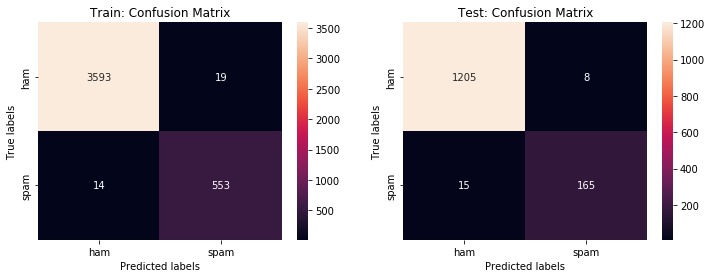

In [70]:
cfmat("MultinomialNB model", y_train, y_pred_train, y_test, y_pred_test)

## d) Display the POS tagging on the first 4 rows of ‘sms’. <a id=4></a>

In [71]:
rows = ["First Row:","Second Row:","Third Row:","Fourth Row:"]
print('\n','\033[1m' + 'POS Tagging' + '\033[0m')
for i in range(0,4,1):
    print("\n>>>> {} ".format(rows[i]))
    print(nltk.pos_tag(word_tokenize(df['SMS'][i])))


 POS Tagging

>>>> First Row: 
[('go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('bugis', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('e', 'VBP'), ('buffet', 'JJ'), ('cine', 'NN'), ('got', 'VBD'), ('amore', 'RB'), ('wat', 'JJ')]

>>>> Second Row: 
[('ok', 'JJ'), ('lar', 'JJ'), ('joking', 'NN'), ('wif', 'NN'), ('oni', 'NN')]

>>>> Third Row: 
[('free', 'JJ'), ('entry', 'NN'), ('wkly', 'VBD'), ('comp', 'NN'), ('win', 'NN'), ('fa', 'JJ'), ('cup', 'VBZ'), ('final', 'JJ'), ('tkts', 'NN'), ('st', 'NN'), ('may', 'MD'), ('text', 'VB'), ('fa', 'JJ'), ('receive', 'JJ'), ('entry', 'NN'), ('questionstd', 'NN'), ('txt', 'NN'), ('ratetcs', 'NN'), ('apply', 'NN'), ('overs', 'NNS')]

>>>> Fourth Row: 
[('dun', 'NNS'), ('say', 'VBP'), ('early', 'JJ'), ('hor', 'NN'), ('already', 'RB'), ('say', 'VB')]


## e) Build and display a dependency parser tree for the sentence :

  “the series opened 17 years later, as Viserys Targaryen tried to win an eastern tribal army to his side, so he could retake the Iron Throne” <a id=5></a>

In [72]:
nlp=spacy.load('en_core_web_sm')

text='the series opened 17 years later, as Viserys Targaryen tried to win an eastern tribal army to his side, so he could retake the Iron Throne'

for token in nlp(text):
 print(token.text,'=>',token.dep_,'=>',token.head.text)

the => det => series
series => nsubj => opened
opened => ROOT => opened
17 => nummod => years
years => npadvmod => later
later => advmod => opened
, => punct => opened
as => mark => tried
Viserys => compound => Targaryen
Targaryen => nsubj => tried
tried => advcl => opened
to => aux => win
win => xcomp => tried
an => det => army
eastern => amod => army
tribal => amod => army
army => dobj => win
to => prep => win
his => poss => side
side => pobj => to
, => punct => opened
so => mark => retake
he => nsubj => retake
could => aux => retake
retake => conj => opened
the => det => Throne
Iron => compound => Throne
Throne => dobj => retake


In [73]:
displacy.render(nlp(text),jupyter=True)